**DIAMOND PRICE PREDICTION**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing 

In [ ]:
#data loading
df=pd.read_csv("https://www.dropbox.com/s/5saczr8wmjketen/DiamondPrices.csv?dl=1")
df.drop('sn',axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.shape

(53940, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sn       53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
#data preprocessing
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

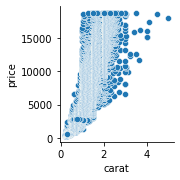

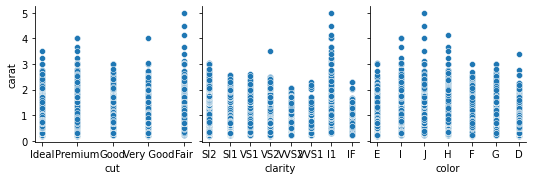

In [ ]:
#plot price vs carat
sns.pairplot(df,x_vars=['carat'],y_vars=['price'])
#plot carat vs other Cs
sns.pairplot(df,x_vars=['cut','clarity','color'],y_vars=['carat'])

In [ ]:
linear_vars=df.select_dtypes(include=[np.number]).columns
display(list(linear_vars))

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [ ]:
#check any zero value
print('0 values -->',0 in df.values)
df[linear_vars]=df[linear_vars]+0.01
print('Filled all 0 values with 0.01.now any 0 values? -->',0 in df.values)

0 values --> True
Filled all 0 values with 0.01.now any 0 values? --> False


In [ ]:
#view and remove outliers using z-score
def sorteddf(df,listvar):
  for var in listvar:
    display('sorted by '+var+'-->'+str(list(df[listvar].sort_values(by=var,ascending=False)[var].head())))

In [ ]:
sorteddf(df,linear_vars)

'sorted by carat-->[5.02, 4.51, 4.14, 4.02, 4.02]'

'sorted by depth-->[79.01, 79.01, 78.21000000000001, 73.61, 72.91000000000001]'

'sorted by table-->[95.01, 79.01, 76.01, 73.01, 73.01]'

'sorted by price-->[18823.01, 18818.01, 18806.01, 18804.01, 18803.01]'

'sorted by x-->[10.75, 10.24, 10.15, 10.03, 10.02]'

'sorted by y-->[58.91, 31.810000000000002, 10.549999999999999, 10.17, 10.11]'

'sorted by z-->[31.810000000000002, 8.07, 6.99, 6.7299999999999995, 6.4399999999999995]'

In [ ]:
def dfboxplot(df,listvar):
  fig,axes=plt.subplots(nrows=1,ncols=len(listvar),figsize=(20,3))
  counter=0
  for ax in axes:
    df.boxplot(column=listvar[counter],ax=axes[counter])
  plt.ylabel('Price')
  plt.xlabel(listvar[counter])
  counter=counter+1
  plt.show()

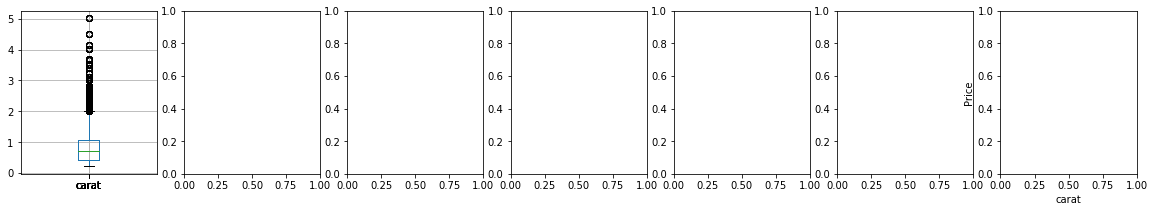

In [ ]:
dfboxplot(df,linear_vars)

In [ ]:
#to remove outliers
def removeoutliers(df,listvars,z):
  from scipy import stats
  for var in listvars:
    df1=df[np.abs(stats.zscore(df[var]))<z]
  return df1
  df=removeoutliers(df,linear_vars,2)

In [ ]:
#convert to log scale
def convertfeatures2log(df,listvars):
  for var in listvars:
    df[var]=np.log(df[var])
    convertfeatures2log(df,linear_vars)


In [ ]:
#to convert categorial column to numeric column
def convert_catg(df1):
  from sklearn.preprocessing import LabelEncoder
  le=LabelEncoder()
  object_cols=list(df1.select_dtypes(exclude=[np.number]).columns)
  object_cols_ind=[]
  for col in object_cols:
    object_cols_ind.append(df1.columns.get_loc(col))
    
  for i in object_cols_ind:
    df1.iloc[:,i]=le.fit_transform(df1.iloc[:,i])

In [ ]:
convert_catg(df)
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.24,2,1,3,61.51,55.01,326.01,3.96,3.99,2.44
1,0.22,3,1,2,59.81,61.01,326.01,3.90,3.85,2.32
2,0.24,1,1,4,56.91,65.01,327.01,4.06,4.08,2.32


In [ ]:
x_df=df.drop(['price','x','y','z'],axis=1)
y_df=df[['price']]

In [ ]:
df_le=x_df.copy()
df_le['price']=y_df['price'].values
df_le.corr()

,carat,cut,color,clarity,depth,table,price
carat,1.000000,0.017124,0.291437,-0.214290,0.028224,0.181618,0.921591
cut,0.017124,1.000000,0.000304,0.028235,-0.194249,0.150327,0.039860
color,0.291437,0.000304,1.000000,-0.027795,0.047279,0.026465,0.172511
clarity,-0.214290,0.028235,-0.027795,1.000000,-0.053080,-0.088223,-0.071535
depth,0.028224,-0.194249,0.047279,-0.053080,1.000000,-0.295779,-0.010647
table,0.181618,0.150327,0.026465,-0.088223,-0.295779,1.000000,0.127134
price,0.921591,0.039860,0.172511,-0.071535,-0.010647,0.127134,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
x_df=sc_X.fit_transform(x_df)
x_df[0:3]

array([[-1.19816781, -0.53809897, -0.93716275, -0.4842643 , -0.17409151,
        -1.09967199],
       [-1.24036129,  0.43494935, -0.93716275, -1.06411727, -1.36073849,
         1.58552871],
       [-1.19816781, -1.51114729, -0.93716275,  0.09558866, -3.38501862,
         3.37566251]])

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_df,y_df,test_size=0.3,random_state=42)

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
reg_all=LinearRegression()
reg_all.fit(X_train,y_train)
y_pred=reg_all.predict(X_test)

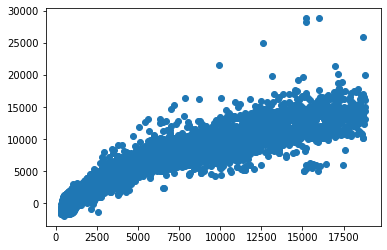

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


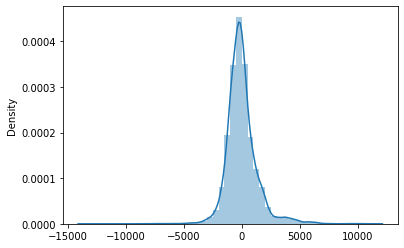

In [ ]:
import seaborn as sns
sns.distplot((y_test-y_pred),bins=50);

In [ ]:
#convert prices and prediction
y_pred2=np.exp(y_pred)
y_test2=np.exp(y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
